**Import Dataset**

In [ ]:
import pandas as pd

wine_df = pd.read_csv("data/winemag-data-130k-v2.csv")

**Data Manipulation**

In [ ]:
# Extracted "year" from title 

wine_df['year'] = wine_df.loc[:,'title'].str.extract(r'(\d+)')
wine_df

In [ ]:
wine_df.shape

In [ ]:
wine_df['taster_name'].nunique()

In [ ]:
## leave year 1900-2021
import numpy as np

for i in range(len(wine_df)):
    if pd.isnull(wine_df['year'][i]) == True:
        wine_df['year'][i] = np.nan
    else:
        wine_df['year'][i] = int(wine_df['year'][i])
        if (wine_df['year'][i] < 1900) or (wine_df['year'][i] > 2021):
            wine_df['year'][i] = np.nan

In [ ]:
wine_df['year'].unique()

In [ ]:
wine_df.nunique()

### Select columns 

Among these 13 features, id for index and the flavor description were excluded as of no
interest. The vineyard, province and regions variables were also excluded for the reason that they are
nested information under country and winery variables. 19 taster names and their twitter names were also
not on the list of interest since a huge portion of data have no information of taster name and they are not
even variables of interest at this project. To add a year (vintage) variable, vintage was extracted from the
title variable. Lastly, the final 5 features, which are country, price, vintage(year), winery and wine variety
were analyzed on the target variable, wine points.

In [ ]:
# Select the columns
use_cols = ['country', 'points', 'price', 'variety', 'winery', 'year']
df_c = wine_df[use_cols]
df_c = df_c.to_csv("data/df_c.csv", index=False)

### Imported clenaed wine_df: df

In [25]:
import pandas as pd

df_c = pd.read_csv("data/df_c.csv")
df_c.head()

,country,points,price,variety,winery,year
0,Italy,87,NaN,White Blend,Nicosia,2013.0
1,Portugal,87,15.0,Portuguese Red,Quinta dos Avidagos,2011.0
2,US,87,14.0,Pinot Gris,Rainstorm,2013.0
3,US,87,13.0,Riesling,St. Julian,2013.0
4,US,87,65.0,Pinot Noir,Sweet Cheeks,2012.0


#### Missing values

In [25]:
print("The number of missing for each feature \n", df_c.isnull().sum(), "\n", "The number of total rows: ", df_c.shape[0])

The number of missing for each feature 
 country      63
points        0
price      8996
variety       1
winery        0
year       5496
dtype: int64 
 The number of total rows:  129971


In [26]:
print("The % of missing values for each feature \n", (df_c.isnull().sum(axis = 0)/df_c.shape[0])*100)

The % of missing values for each feature 
 country    0.048472
points     0.000000
price      6.921544
variety    0.000769
winery     0.000000
year       4.228636
dtype: float64


Among features, the target variable, "points", and feature variables, "winery" and "variety", have no missing values. In addition, country, price and year have negligible missing values, 0.05%, 6.92% and 4.22%, respectively. Therefore, I excluded observations containing missing values. 

In [2]:
df = df_c.dropna()
print("The % of observations after excluding missing values", (df.shape[0]/df_c.shape[0])*100)
print(df.shape)

The % of observations after excluding missing values 89.18758800040008
(115918, 6)


Selected variables which I wanted to know the relationship with `points`. 

**EDA**

In [4]:
print(df.shape) #(115918, 6)
print(df.describe())

(115918, 6)
              points          price           year
count  115918.000000  115918.000000  115918.000000
mean       88.462991      35.557774    2010.721855
std         3.045365      41.329881       3.746093
min        80.000000       4.000000    1904.000000
25%        86.000000      17.000000    2009.000000
50%        88.000000      25.000000    2011.000000
75%        91.000000      42.000000    2013.000000
max       100.000000    3300.000000    2017.000000


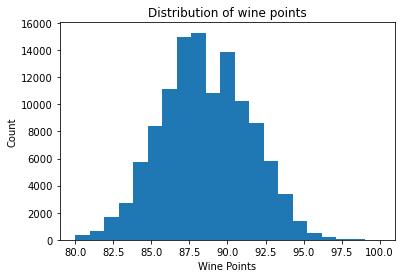

In [5]:
from matplotlib import pyplot as plt

df['points'].plot.hist(bins = df['points'].nunique())
plt.title('Distribution of wine points')
plt.xlabel('Wine Points')
plt.ylabel('Count')
plt.savefig('figures/dist_points.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")
plt.show()

In [6]:
print(df['winery'].nunique())
print(df['variety'].nunique())
print(df['country'].nunique())

15300
682
42


In [3]:
# Select the rows by popularity
df_pop = df

top_var = ['Cabernet Sauvignon', 'Chardonnay', 'Pinot Gris', 'Pinot Noir', 'Sauvignon Blanc', 'Merlot',
          'Zinfandel', 'Malbec', 'Riesling', 'Shiraz']

df_pop['variety'] = df_pop['variety'].replace(['Syrah'],'Shiraz')
df_pop['variety'] = df_pop['variety'].replace(['Garnacha'],'Grenache')
df_pop.loc[df_pop['variety'].isin(list(top_var)) == False, 'variety'] = "other"

/tmp/ipykernel_51455/434070892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['variety'] = df_pop['variety'].replace(['Syrah'],'Shiraz')
/tmp/ipykernel_51455/434070892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['variety'] = df_pop['variety'].replace(['Garnacha'],'Grenache')
/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

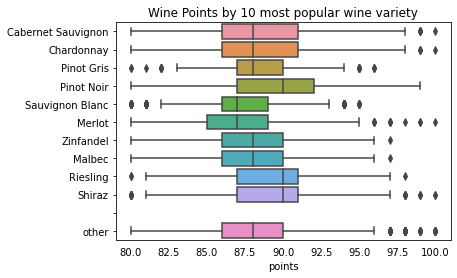

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

variety_order = df_pop.groupby('variety')['points'].mean().sort_values(ascending = False).index
variety_pop_order = top_var + [""] + ["other"]

variety_bp = sns.boxplot(y = "variety", x = "points", order = variety_pop_order, data = df_pop)
variety_bp.set_title("Wine Points by 10 most popular wine variety")
variety_bp.set(ylabel = "")
variety_bp.tick_params(bottom=False)
plt.savefig('figures/topvars.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")

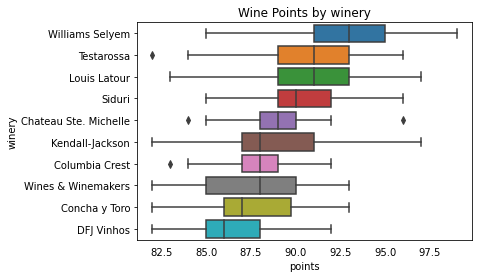

In [9]:
import seaborn as sns

# top most frequent variety
top_winery = df['winery'].value_counts()[:10].index

# sorting from largest mean to lowest mean 
winery_order =  df.loc[df['winery'].isin(list(top_winery))].groupby('winery')['points'].mean().sort_values(ascending = False).index

winery_bp = sns.boxplot(y = "winery", x = "points", order = winery_order, data =  df.loc[df['winery'].isin(list(top_winery))])
winery_bp.set_title("Wine Points by winery")
winery_bp.tick_params(bottom=False)
plt.savefig('figures/topwine.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")
plt.show()

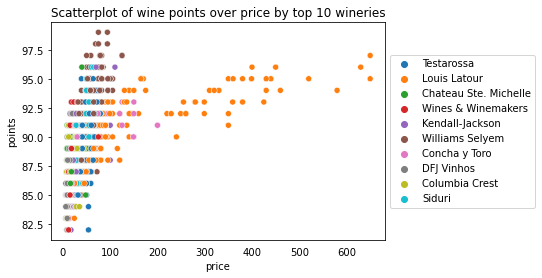

In [10]:
ppw = sns.scatterplot(x="price", y="points", 
                      data = df.loc[df['winery'].isin(list(top_winery))], hue = 'winery')
ppw.set_title("Scatterplot of wine points over price by top 10 wineries")
ppw.legend(loc ='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ppw.tick_params(bottom=False)
plt.savefig('figures/topwine_points.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")

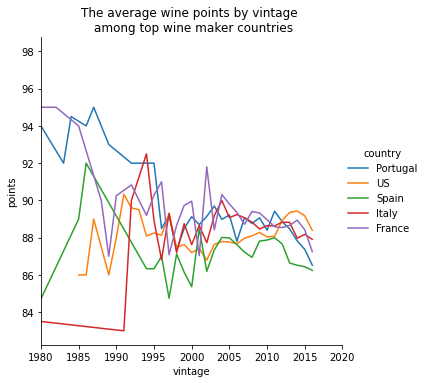

In [11]:
# top most frequent country
top_country = df['country'].value_counts()[:5].index

pp_plot = sns.relplot(x = "year", y = "points", kind = "line", ci=None,
                      data = df.loc[df['country'].isin(list(top_country))], hue = 'country')
pp_plot.set(title = 'The average wine points by vintage \n among top wine maker countries', xlabel = 'vintage',
           xlim = (1980, 2020))
plt.savefig('figures/topvint.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")
plt.show()

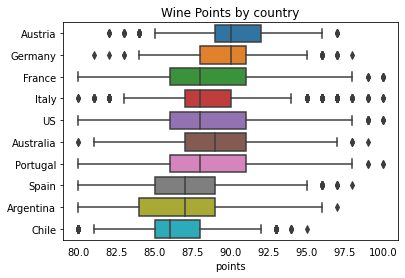

In [12]:
# sorting from largest mean to lowest mean 
top10country = df['country'].value_counts()[:10].index

country_order = df.loc[df['country'].isin(list(top10country))].groupby('country')['points'].mean().sort_values(ascending = False).index

country_bp = sns.boxplot(y = "country", x = "points", order = country_order, data = df.loc[df['country'].isin(list(top10country))])
country_bp.set_title("Wine Points by country")
country_bp.set(ylabel = "")
country_bp.tick_params(bottom=False)
plt.savefig('figures/topcountry.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")
plt.show()

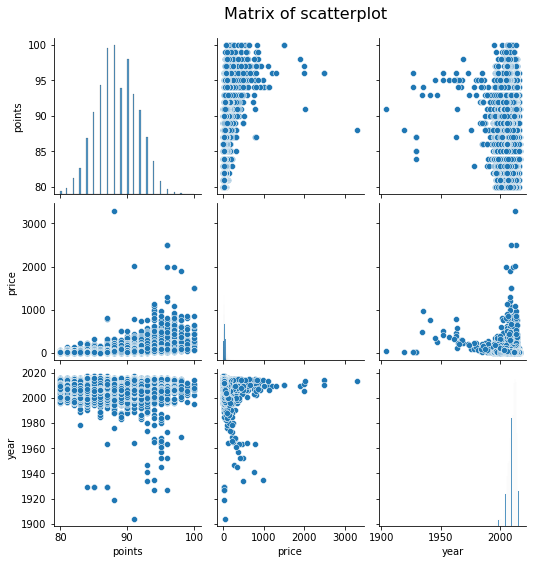

In [13]:
sns.pairplot(df)
plt.title('Matrix of scatterplot', x = -0.5, y=3.2, fontsize = 16)
plt.savefig('figures/Mat_scatter.png', dpi=300, facecolor ="w", edgecolor ='w', bbox_inches ="tight")
plt.show()

**Data Preprocessing**

**country, variety, winery** : As country cannot be ordered, I chose one-hot encoder.
**year** This variable is reasonably bounded and did not follow the tailed distribution, I used MinMaxScaler to scale the features.
**price** This variable seems to follow the tailed distribution, I used StandardScaler.

In [4]:
# categorical variables: top vs others

# variety
top10_var = ['Cabernet Sauvignon', 'Chardonnay', 'Pinot Gris', 'Pinot Noir', 'Sauvignon Blanc', 'Merlot',
          'Zinfandel', 'Malbec', 'Riesling', 'Shiraz']
df['variety'] = df['variety'].replace(['Syrah'],'Shiraz')
df['variety'] = df['variety'].replace(['Garnacha'],'Grenache')
df.loc[df['variety'].isin(list(top10_var)) == False, 'variety'] = "other"

# winery
top30_winery = df['winery'].value_counts()[:30].index
df.loc[df['winery'].isin(list(top30_winery)) == False, 'winery'] = "other"

# country
top10_country = df['country'].value_counts()[:10].index
df.loc[df['country'].isin(list(top10_country)) == False, 'country'] = "other"


/tmp/ipykernel_51455/1670245574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variety'] = df['variety'].replace(['Syrah'],'Shiraz')
/tmp/ipykernel_51455/1670245574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variety'] = df['variety'].replace(['Garnacha'],'Grenache')


In [18]:
df.groupby(['country']).size()

country
Argentina     3672
Australia     2204
Austria       2766
Chile         4357
France       16366
Germany       2104
Italy        16034
Portugal      4643
Spain         6031
US           52754
other         4987
dtype: int64

In [19]:
df.groupby(['variety']).size()

variety
Cabernet Sauvignon     9240
Chardonnay            10744
Malbec                 2560
Merlot                 3011
Pinot Gris             1370
Pinot Noir            12571
Riesling               4930
Sauvignon Blanc        4715
Shiraz                 4851
Zinfandel              2663
other                 59263
dtype: int64

In [20]:
df.groupby(['winery']).size()

winery
Chanson Père et Fils              99
Chateau Ste. Michelle            193
Chehalem                         102
Columbia Crest                   158
Concha y Toro                    162
D'Arenberg                       100
DFJ Vinhos                       209
Dutton-Goldfield                 100
Fess Parker                      107
Foxen                            105
Gary Farrell                     125
Georges Duboeuf                  120
Iron Horse                       105
Jean-Luc and Paul Aegerter       100
Kendall-Jackson                  130
Kunde                            101
Louis Latour                     173
Lynmar                           118
Maryhill                         102
Montes                           117
Robert Mondavi                   112
Santa Ema                        110
Siduri                           126
Terre Rouge                      100
Testarossa                       217
Trapiche                         111
Undurraga                      

# Methods

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
import pickle

# Create feature matrix and target variable ####################

y = df['points']
X = df.loc[:, df.columns != 'points']

# Preprocessor
onehot_ftrs = ['country', 'variety', 'winery']
minmax_ftrs = ['year']
std_ftrs = ['price']

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)]) 

In [178]:
def MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid):
    
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    best_models = []
    test_scores = []
    
    # Repeat this 10 times for 10 different random states
    for i in range(10):
        random_state = 1001 * i
        
        # split the data to other and test (80-20)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = random_state)
        
        # Use KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state = random_state)
        
        # Preprocess the data
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('ML_algo', ML_algo)])
        
               
        # perform cross validation (R2 as the evaluation metric)
        grid = GridSearchCV(model_pipeline, param_grid = param_grid, 
                            scoring = make_scorer(r2_score),
                            cv = kf, return_train_score = True, n_jobs = -1)
        grid.fit(X_train, y_train)
        
        # Return the 10 best models 
        best_models.append(grid.best_estimator_)
                
        # Return the 10 test scores.
        test_score = r2_score(y_test, grid.predict(X_test))
        # Check reproducibility
        ## the exact same test scores
        print("test score: ", test_score)
        test_scores.append(test_score)
        
        # Check reproducibility
        ## best hyperparameters
        print("Best hyperparameters: ", grid.best_params_)
        
    return grid, X_test, y_test, best_models, test_scores

### LASSO

In [179]:
from sklearn.linear_model import Lasso

ML_algo = Lasso()
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {'ML_algo__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]}

grid_lasso, X_test_lasso, y_test_lasso, best_models_lasso, test_scores_lasso = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
print("Test scores for %s" % (ML_algo), test_scores_lasso)
print("ML algorithm: %s, Mean of test scores = %f, Std of test scores = %f" % (ML_algo, np.mean(test_scores_lasso), np.std(test_scores_lasso)))


# save the output
import pickle
file = open('results/grid_lasso.save', 'wb')
pickle.dump((grid_lasso, X_test_lasso, y_test_lasso), file)
file.close()

test score:  0.21966977460603143
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.19256927963711368
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.24378162611574894
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.2458624689258454
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.23919038082721344
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.25710177237319
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.2413091439441457
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.21559076113639453
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.20383269282645944
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
test score:  0.22618014909199058
Best hyperparameters:  {'ML_algo__alpha': 0.0001}
Test scores for Lasso() [0.21966977460603143, 0.19256927963711368, 0.24378162611574894, 0.2458624689258454, 0.23919038082721344, 0.25710177237319, 0.2413091439441457, 0.215590

In [214]:
y_train_lasso = y.loc[df.index.difference(y_test_lasso.index)]
np.mean(y_train_lasso)

88.46699161041258

### Elastic Net

In [8]:
from sklearn.linear_model import ElasticNet

ML_algo = ElasticNet()
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {'ML_algo__alpha': [0.1, 1, 10, 100, 250, 500],
             'ML_algo__l1_ratio': np.linspace(0.001, 0.99, 6),
             'ML_algo__max_iter': [5000]}

grid_en, X_test_en, y_test_en, best_models_en, test_scores_en = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
print("Test scores for %s" % (ML_algo), test_scores_en)
print("ML algorithm: %s, Mean of test scores = %i, Std of test scores = %i" % (ML_algo, np.mean(test_scores_en), np.std(test_scores_en)))


# save the output
import pickle
file = open('results/grid_en.save', 'wb')
pickle.dump((grid_en, X_test_en, y_test_en), file)
file.close()

test score:  0.18302800518257856
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.16258303163333543
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.20420879082414645
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.20525802144745042
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.19985313707281194
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.21340132586239957
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.20223339203688728
Best hyperparameters:  {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.001, 'ML_algo__max_iter': 5000}
test score:  0.18180735197074582
Best hyperparameters: 

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

ML_algo = RandomForestRegressor()
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {'ML_algo__max_depth': [1, 2, 3, 5, 10],
              'ML_algo__max_features': [3, 6] + ['auto', 'sqrt']}

grid_rf, X_test_rf, y_test_rf, best_models_rf, test_scores_rf = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
print("Test scores for %s" % (ML_algo), test_scores_rf)
print("ML algorithm: %s, Mean of test scores = %f, Std of test scores = %f" % (ML_algo, np.mean(test_scores_rf), np.std(test_scores_rf)))


# save the output
import pickle
file = open('results/grid_rf.save', 'wb')
pickle.dump((grid_rf, X_test_rf, y_test_rf), file)
file.close()

test score:  0.43364590273710424
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.4398133004465873
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.4397972393835442
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.4415285680718506
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.44662887543674756
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.44054034587738944
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.43872595101905265
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.4453462906663678
Best hyperparameters:  {'ML_algo__max_depth': 10, 'ML_algo__max_features': 'auto'}
test score:  0.4319082752529939
Best hyperparameters:  {'ML_algo__max_depth'

### XGBoost

In [18]:
import xgboost


def XGB_R2(X, y):
    
    
    test_scores_all = []
    max_depths_all = []

    for i in range(10):
        random_states = 1001 * i
        # 4. Split data into train, CV, and test (6:2:2) ####################
        X_other, X_test, y_other, y_test = train_test_split(df, y, train_size = 0.8, random_state = random_states)
        X_train, X_cv, y_train, y_cv = train_test_split(X_other, y_other, train_size = 0.75, random_state = random_states)

        # Preprocessor
        onehot_ftrs = ['country', 'variety', 'winery']
        minmax_ftrs = ['year']
        std_ftrs = ['price']

        preprocessor = ColumnTransformer(
            transformers = [
                ('cat', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
                ('minmax', MinMaxScaler(), minmax_ftrs),
                ('std', StandardScaler(), std_ftrs)]) 
        
        ### fit_transform the training set
        X_prep = preprocessor.fit_transform(X_train)

        ##### collect feature names
        feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names(onehot_ftrs)) + \
                        preprocessor.transformers_[1][-1] + \
                        preprocessor.transformers_[2][-1]

        df_train = pd.DataFrame(data = X_prep,columns = feature_names)

        ### transform the CV
        df_cv = preprocessor.transform(X_cv)
        df_cv = pd.DataFrame(data = df_cv,columns = feature_names)

        ### transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data = df_test,columns = feature_names)

        test_scores = []
        max_depths = []

            
        # 6. Which ML algo?
        XGB = xgboost.XGBRegressor()

        # 7. Which hyperparameters?
        param_grid = {"learning_rate": [0.03],
                  "n_estimators": [10000],
                  "seed": [random_states],
                  "missing": [np.nan], 
                  "colsample_bytree": [0.9],              
                  "subsample": [0.66]}

        max_depth = [1, 2, 3, 5, 10, 30, 100]

        for md in max_depth:

            # 8. Train ML algo ####################

            param_grid['max_depth'] = [md]
            XGB.set_params(**ParameterGrid(param_grid)[0])
            XGB.fit(df_train, y_train, early_stopping_rounds = 50, eval_set=[(df_cv, y_cv)], verbose=False)
            y_train_pred = XGB.predict(df_train)
            y_cv_pred = XGB.predict(df_cv)
            y_test_pred = XGB.predict(df_test)

            # 9. Calculate validation R2 scores ####################
            ### Accumulate the training and validation scores into arrays

            test_scores.append(r2_score(y_test, y_test_pred))
            max_depths.append(md)


        ### print out the best test score and the best max depth value for each random state
        print("The best test score (highest R2 score):", np.max(test_scores))
        index = np.where(test_scores == np.max(test_scores))
        for ind in range(len(index)):
            print("The best max depth at the best test score:", max_depths[index[ind][0]])   

        test_scores_all.append(test_scores)
        max_depths_all.append(max_depths)

    return test_scores_all, max_depths_all, X_test, y_test

test_scores_xgb, max_depths_xgb, X_test_xgb, y_test_xgb = XGB_R2(X, y)
print("Test scores for %s" % (ML_algo), test_scores_xgb)
print("ML algorithm: %s, Mean of test scores = %f, Std of test scores = %f" % (ML_algo, np.mean(test_scores_xgb), np.std(test_scores_xgb)))


# save the output
import pickle
file = open('results/grid_xgb.save', 'wb')
pickle.dump((test_scores_xgb, max_depths_xgb, X_test_xgb, y_test_xgb), file)
file.close()

The best test score (highest R2 score): 0.4528272410398617
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4571127724697204
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.45633628390057124
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4621419936624874
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4645097987126401
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4587006613803344
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.45551976217482926
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.46482423511630844
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4515144503570826
The best max depth at the best test score: 10
The best test score (highest R2 score): 0.4593186503

In [207]:
print(len(feature_names))

55


### Performance of the ML models

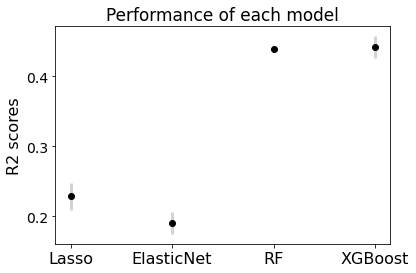

In [195]:

plt.errorbar(x = ["Lasso", "ElasticNet", "RF", "XGBoost"], 
             y = [np.mean(test_scores_lasso), np.mean(test_scores_en), np.mean(test_scores_rf), np.mean(test_scores_xgb)],
             yerr = [np.std(test_scores_lasso), np.std(test_scores_en), np.std(test_scores_rf), np.std(test_scores_xgb)], 
             fmt = 'o', color = 'black', ecolor = 'lightgray', elinewidth = 3)
plt.xlabel("")
plt.ylabel("R2 scores", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14)
plt.title("Performance of each model", fontdict = {'fontsize' : 17})
plt.savefig('figures/performance.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

### Global feature importances

#### Permutation 

In [27]:
from sklearn.compose import ColumnTransformer
### Preprocessor
onehot_ftrs = ['country', 'variety', 'winery']
minmax_ftrs = ['year']
std_ftrs = ['price']

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)]) 

ftr_names = X.columns

In [40]:
import pickle
file = open('results/grid_rf.save', 'rb')
grid_rf, X_test_rf, y_test_rf = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores_rf = np.zeros([len(ftr_names),nr_runs])

test_score_rf = grid_rf.score(X_test_rf,y_test_rf)
print('test score (RF) = ',test_score_rf)
print('test baseline (RF) = ',np.sum(y_test_rf == 0)/len(y_test_rf))

# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    r2_scores_rf = []
    for j in range(nr_runs):
        X_test_rf_shuffled = X_test_rf.copy()
        X_test_rf_shuffled[ftr_names[i]] = np.random.permutation(X_test_rf[ftr_names[i]].values)
        r2_scores_rf.append(grid_rf.score(X_test_rf_shuffled,y_test_rf))
    print('   shuffled test score:',np.around(np.mean(r2_scores_rf),3),'+/-',np.around(np.std(r2_scores_rf),3))
    scores_rf[i] = r2_scores_rf

test score (RF) =  0.4417336274374448
test baseline (RF) =  0.0
shuffling country
   shuffled test score: 0.387 +/- 0.002
shuffling price
   shuffled test score: -0.381 +/- 0.006
shuffling variety
   shuffled test score: 0.417 +/- 0.001
shuffling winery
   shuffled test score: 0.438 +/- 0.0
shuffling year
   shuffled test score: 0.383 +/- 0.002


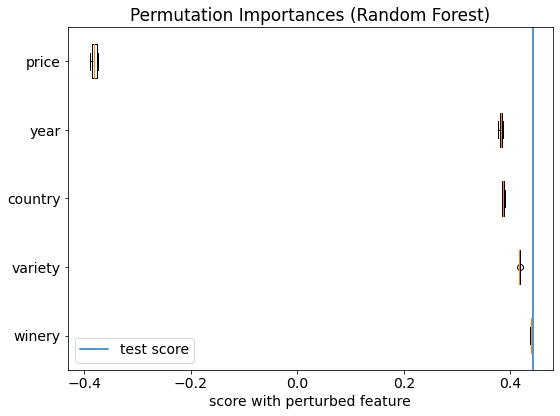

In [196]:
import matplotlib.pylab as plt

sorted_indcs = np.argsort(np.mean(scores_rf,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores_rf[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score_rf,label='test score')
plt.title("Permutation Importances (Random Forest)", fontdict = {'fontsize' : 17})
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('figures/permut_rf.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

#### Coefficients of linear models

In [76]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

def MLpipe_KFold_R2_global(X, y, preprocessor, ML_algo, param_grid):
    
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    best_models = []
    test_scores = []
    
    # Repeat this 10 times for 10 different random states
    for i in range(10):
        random_state = 1001 * i
        
        # split the data to other and test (80-20)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = random_state)
        
        # Use KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state = random_state)
        
        # Preprocessor
        
        minmax_ftrs = ['year']
        std_ftrs = ['price']
        onehot_ftrs = ['country', 'variety', 'winery']

        preprocessor = ColumnTransformer(
            transformers = [                
                ('minmax', MinMaxScaler(), minmax_ftrs),
                ('std', StandardScaler(), std_ftrs),
                ('cat', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs)]) 
        
        # Preprocess the data
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('final_scaler', final_scaler),
                                         ('ML_algo', ML_algo)])
        
               
        # perform cross validation (R2 as the evaluation metric)
        grid = GridSearchCV(model_pipeline, param_grid = param_grid, 
                            scoring = make_scorer(r2_score),
                            cv = kf, return_train_score = True, n_jobs = -1)
        grid.fit(X_train, y_train)
        
        feature_names = minmax_ftrs + \
                        std_ftrs + \
                        list(grid.best_estimator_[0].named_transformers_['cat'].get_feature_names(onehot_ftrs))
    
      
    return grid, np.array(feature_names), X_test, y_test


ML_algo = Lasso()
final_scaler = StandardScaler()
param_grid = {'ML_algo__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]}

grid, feature_names, X_test, y_test = MLpipe_KFold_R2_global(X, y, preprocessor, ML_algo, param_grid)


/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1562.719861351652, tolerance: 64.4806366369533
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.90976060315734, tolerance: 64.54466744690914
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1551.8373926574714, tolerance: 64.91072403163119
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/env

/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467.1847318733926, tolerance: 64.45781519460577
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.6839444434736, tolerance: 64.46746861826051
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/envs/data1030/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204.5061105118366, tolerance: 64.35740747088354
  model = cd_fast.enet_coordinate_descent(
/home/younkyeong/anaconda3/env

test score: 0.22621360881786368


IndexError: invalid index to scalar variable.

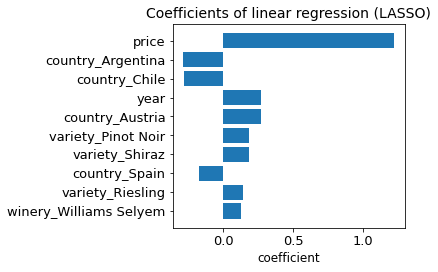

In [202]:
coefs = grid.best_estimator_[-1].coef_
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient', fontsize = 12)
plt.title('Coefficients of linear regression (LASSO)', fontdict = {'fontsize' : 14})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.savefig('figures/lasso_global.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

#### RF

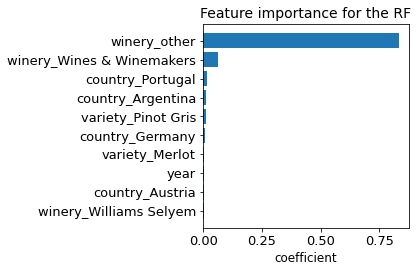

In [203]:
import pickle
file = open('/home/younkyeong/Documents/DATA1030/project_younkyeongchang/grid_rf.save', 'rb')
grid_rf, X_test_rf, y_test_rf = pickle.load(file)
file.close()

coefs_rf = grid_rf.best_estimator_.named_steps["ML_algo"].feature_importances_
sorted_indcs_rf = np.argsort(np.abs(coefs_rf))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs_rf[sorted_indcs_rf[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs_rf[-10:]])
plt.xlabel('coefficient', fontsize = 12)
plt.title('Feature importance for the RF', fontdict = {'fontsize' : 14})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.savefig('figures/rf_global.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

#### SHAP

In [122]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid_rf.best_estimator_[1])
# transform the test set
X_test_transformed = grid_rf.best_estimator_[0].transform(X_test_rf)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(23184, 55)
(1000, 55)


88.4666622813639


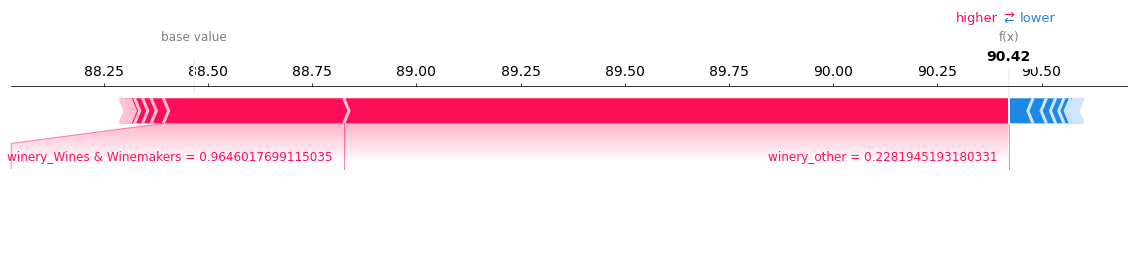

In [152]:
index = 1 # the index of the point to explain
print(explainer.expected_value[0]) 
shap.force_plot(explainer.expected_value[0], shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names, matplotlib=True, show = False)
plt.savefig('figures/rf_shap.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")


#### Feature value vs shap value

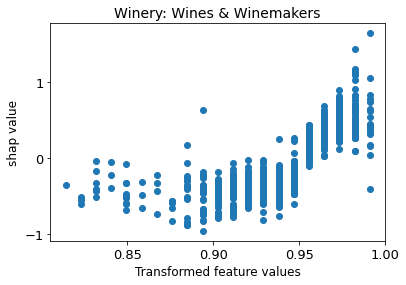

In [205]:
plt.rcParams.update({'font.size': 20})
ftr = 'winery_Wines & Winemakers'
indx = np.argwhere(feature_names=='winery_Wines & Winemakers')
plt.scatter(X_test_transformed[:1000,indx],shap_values[:,indx])
plt.ylabel('shap value', fontsize = 12)
plt.xlabel('Transformed feature values', fontsize = 12)
plt.title('Winery: Wines & Winemakers', fontdict = {'fontsize' : 14})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('figures/feature_shap.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

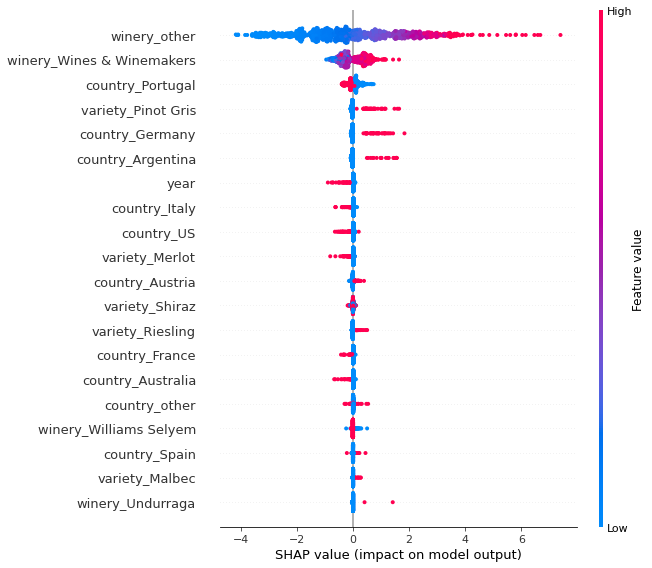

In [169]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names, show = False)
plt.savefig('figures/global_shap.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
